In [13]:
# w2v_model = '/Users/iijima.s.ad/git/JASen/word2vec_100.txt'
w2v_model = '/Users/iijima.s.ad/git/JASen/drones_word2vec_100.txt'
article_folder_path = '/Users/iijima.s.ad/git/article-extractor/articles/fox/drones/*/'

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(w2v_model, binary=False)

In [26]:
import numpy as np

positive = ['good', 'great', 'nice', 'excellent', 'perfect']
negative = ['bad', 'terrible', 'horrible', 'disappointed', 'awful']

positive_vector = np.average([model[w] for w in positive if w in model], axis=0)
negative_vector = np.average([model[w] for w in negative if w in model], axis=0)


In [11]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

In [22]:
import numpy as np

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [27]:
import glob
import os
import numpy as np

article_sentiments = []

article_folders = glob.glob(article_folder_path)
for folder in article_folders:
    if not os.path.exists(os.path.join(folder, 'comments.json')):
        continue

    with open(os.path.join(folder, 'comments.json'), 'r') as f:
        sentences = f.readlines()

    if len(sentences) < 10:
        continue

    text = [model[word] for sentence in sentences for word in sentence.strip().split() if word in model and word not in stopwords]
    
    article_sentiments.append(cos_sim(np.average(text, axis=0), negative_vector))

In [30]:
max(article_sentiments)

0.42422894

In [54]:
from nltk.corpus import sentiwordnet as swn
import numpy as np

senti_word_dict = {}

for ss in swn.all_senti_synsets():
    word = ss.synset.name().split('.')[0]
    if word in senti_word_dict:
        senti_word_dict[word].append(ss.pos_score())
    else:
        senti_word_dict[word] = [ ss.pos_score() ]

senti_synsets = sorted([(word, np.max(pos_scores)) for word, pos_scores in senti_word_dict.items()], key=lambda t: t[1], reverse=True)
print(senti_synsets[:300])

[('unsurpassable', 1.0), ('balmy', 1.0), ('good', 1.0), ('estimable', 1.0), ('mean', 1.0), ('homologic', 1.0), ('like', 1.0), ('sensational', 1.0), ('excellent', 1.0), ('top-flight', 1.0), ('admirability', 1.0), ('love', 1.0), ('praise', 1.0), ('happiness', 1.0), ('first-rater', 1.0), ('research_worker', 1.0), ('bliss', 1.0), ('veracious', 0.875), ('clean', 0.875), ('better', 0.875), ('aesthetic', 0.875), ('altruistic', 0.875), ('perked_up', 0.875), ('attractive', 0.875), ('engaging', 0.875), ('fortunate', 0.875), ('gracious', 0.875), ('formidable', 0.875), ('pretty', 0.875), ('benign', 0.875), ('brilliant', 0.875), ('solid', 0.875), ('diffident', 0.875), ('exhaustive', 0.875), ('constructive', 0.875), ('courteous', 0.875), ('uncivil', 0.875), ('fabulous', 0.875), ('incumbent', 0.875), ('blessed', 0.875), ('decent', 0.875), ('gladdened', 0.875), ('dignified', 0.875), ('discerning', 0.875), ('firm', 0.875), ('bounden', 0.875), ('incumbent_on', 0.875), ('disenchanted', 0.875), ('admirabl

In [ ]:
from nltk.corpus import sentiwordnet as swn
import numpy as np

senti_word_dict = {}

for ss in swn.all_senti_synsets():
    word = ss.synset.name().split('.')[0]
    if word in senti_word_dict:
        senti_word_dict[word].append(ss.neg_score())
    else:
        senti_word_dict[word] = [ ss.neg_score() ]

senti_synsets = sorted([(word, np.max(neg_scores)) for word, neg_scores in senti_word_dict.items()], key=lambda t: t[1], reverse=True)
print(senti_synsets[:300])

In [30]:
for ss in swn.senti_synsets('illegal'):
    print(ss.synset.name(), ss.neg_score())

illegal.a.01 0.0


In [47]:
words = ['bad', 'terrible', 'horrible', 'disappointed', 'awful', 'ugly', 'miserable', 'negative', 'fearful', 'harsh', 'angry', 'resentful', 'improper', 'ill', 'upset', 'humble', 'deny', 'fear', 'unfriendly', 'evil']
tags = ['[[PERSON]]', '[[ORG]]', '[[NORP]]', '[[FAC]]', '[[LOC]]', '[[GPE]]', '[[PRODUCT]]', '[[WORK_OF_ART]]', '[[EVENT]]']

word_count = {w:[[0 for t in tags], 0] for w in words}

with open('articles/fox/ner_train3.txt') as f:
    for line in f.readlines():
        for word, count in word_count.items():
            if word in line:
                count[1] += 1
                for i, t in enumerate(tags):
                    if t in line:
                        count[0][i] += 1

# sorted_words = sorted([(w, c[0], c[1])for w, c in word_count.items()], key=lambda t: t[1] / t[2] if t[2] > 0 else 0, reverse=True)
for word, counts in word_count.items():
    print(word, end=' ')
    for e in counts[0]:
        print(f'{e / counts[1] if counts[1] > 0 else 0:.4f}', end=' ')
    print(counts[1])

#horrible ugly miserable fearful angry upset humble
    

bad 0.3001 0.3142 0.2338 0.0093 0.0293 0.2372 0.0167 0.0203 0.0096 5805
terrible 0.3290 0.3333 0.2329 0.0131 0.0175 0.2737 0.0131 0.0160 0.0116 687
horrible 0.3025 0.2810 0.2314 0.0066 0.0165 0.2397 0.0066 0.0231 0.0099 605
disappointed 0.3237 0.3353 0.2370 0.0173 0.0173 0.1618 0.0116 0.0173 0.0116 173
awful 0.3543 0.3687 0.2338 0.0108 0.0162 0.2338 0.0180 0.0198 0.0018 556
ugly 0.2527 0.2310 0.1805 0.0072 0.0325 0.1336 0.0108 0.0217 0.0036 277
miserable 0.3721 0.3372 0.2733 0.0233 0.0640 0.2209 0.0000 0.0174 0.0058 172
negative 0.3249 0.3655 0.2538 0.0102 0.0288 0.1895 0.0135 0.0321 0.0152 591
fearful 0.5476 0.5238 0.3571 0.0476 0.0476 0.2381 0.0000 0.0238 0.0238 42
harsh 0.2476 0.3143 0.3048 0.0190 0.0190 0.2762 0.0000 0.0000 0.0286 105
angry 0.3772 0.3293 0.2874 0.0060 0.0220 0.1617 0.0180 0.0200 0.0080 501
resentful 0.0000 0.5000 0.2500 0.0000 0.0000 0.0000 0.0000 0.0000 0.2500 4
improper 0.4058 0.5652 0.1739 0.0000 0.0290 0.2174 0.0435 0.0290 0.0000 69
ill 0.3003 0.3260 0.2604 0.0

In [56]:
words = ['good', 'love', 'better', 'pretty', 'fabulous', 'happy', 'superb', 'amazing', 'nice', 'greatest', 'brilliant', 'great', 'prefer', 'decent', 'worthy', 'perfect', 'healthy', 'courteous', 'happy', 'charming']
tags = ['[[PERSON]]', '[[ORG]]', '[[NORP]]', '[[FAC]]', '[[LOC]]', '[[GPE]]', '[[PRODUCT]]', '[[WORK_OF_ART]]', '[[EVENT]]']

word_count = {w:[[0 for t in tags], 0] for w in words}

with open('articles/fox/ner_train3.txt') as f:
    for line in f.readlines():
        for word, count in word_count.items():
            if word in line:
                count[1] += 1
                for i, t in enumerate(tags):
                    if t in line:
                        count[0][i] += 1

# sorted_words = sorted([(w, c[0], c[1])for w, c in word_count.items()], key=lambda t: t[1] / t[2] if t[2] > 0 else 0, reverse=True)
for word, counts in word_count.items():
    print(word, end=' ')
    for e in counts[0]:
        print(f'{e / counts[1] if counts[1] > 0 else 0:.4f}', end=' ')
    print(counts[1])
    
# great brilliant happy love

good 0.2630 0.2773 0.2057 0.0084 0.0229 0.2218 0.0153 0.0208 0.0071 13825
love 0.3021 0.2853 0.2523 0.0098 0.0249 0.2164 0.0219 0.0229 0.0086 5022
better 0.2872 0.3203 0.2415 0.0092 0.0286 0.2417 0.0200 0.0228 0.0083 7194
pretty 0.2734 0.2974 0.1980 0.0093 0.0324 0.1988 0.0240 0.0275 0.0080 2253
fabulous 0.2500 0.3333 0.1667 0.0000 0.0833 0.1389 0.0556 0.0000 0.0000 36
happy 0.2742 0.2546 0.2356 0.0065 0.0268 0.2212 0.0118 0.0124 0.0105 1528
superb 0.1667 0.1667 0.2500 0.0000 0.0000 0.0833 0.0000 0.0000 0.0000 12
amazing 0.2466 0.2816 0.1956 0.0076 0.0396 0.1743 0.0205 0.0236 0.0084 1314
nice 0.2494 0.2576 0.1770 0.0086 0.0336 0.1875 0.0177 0.0182 0.0082 2085
greatest 0.3312 0.3412 0.3137 0.0200 0.0563 0.3725 0.0150 0.0238 0.0350 800
brilliant 0.3269 0.3139 0.2104 0.0259 0.0485 0.2265 0.0518 0.0324 0.0097 309
great 0.2942 0.2917 0.2163 0.0120 0.0358 0.2609 0.0163 0.0233 0.0140 7906
prefer 0.2617 0.3328 0.2811 0.0081 0.0388 0.2456 0.0145 0.0307 0.0065 619
decent 0.2845 0.3343 0.2346 0.0

In [136]:
# commentのpredictionの結果からアスペクトとの関連をPERSONのみ確認する
import re
import glob

def trim_s(word):
    return word[:-2] if word[-2:] in ("'s", '’s')  else word

prediction_file_name = 'prediction.txt'
joint_file_name = 'joint_roots.txt'
output_aspect_folder = 'person'
output_aspect_file = 'roots_aspects.txt'
# joint_file_name = 'article_joint.txt'
# output_aspect_folder = 'person'
# output_aspect_file = 'article_aspects.txt'

# tag_dict = {'[[PERSON]]': 0, '[[ORG]]': 1, '[[NORP]]': 1, '[[FAC]]': 2, '[[LOC]]': 2, '[[GPE]]': 2, '[[PRODUCT]]': 3, '[[WORK_OF_ART]]': 3, '[[EVENT]]': 4}
for path in glob.glob('/Users/iijima.s.ad/git/article-extractor/articles/fox/*/*/' + prediction_file_name):
    aspect_list = []
    comment_path = path.replace(prediction_file_name, joint_file_name)
    with open(path, 'r') as prediction, open(comment_path, 'r') as comment_file:
        for pr, m in zip(prediction.readlines()[1:], re.finditer(r'\[\[([^:]+):::(.*?)\]\]', comment_file.read())):
            aspect, senti = pr.strip().split('\t')
            if m.group(1) == 'PERSON' and aspect == '0':
                aspect_list.append(trim_s(m.group(2)) + {'0': '-', '1': '+'}[senti])

    aspect_dict = {}
    for aspect in aspect_list:
        if aspect in aspect_dict:
            aspect_dict[aspect] += 1
        else:
            aspect_dict[aspect] = 1

    os.makedirs(path.replace(prediction_file_name, output_aspect_folder), exist_ok = True)
    aspect_count = path.replace(prediction_file_name, f'{output_aspect_folder}/{output_aspect_file}')
    with open(aspect_count, 'w') as f:
        f.writelines([f'{aspect}\t{count}\n' for aspect, count in aspect_dict.items()])

In [73]:
!find /Users/iijima.s.ad/git/article-extractor/articles/fox | grep -c 'prediction.txt'

161


In [137]:
import numpy as np

for path in glob.glob('/Users/iijima.s.ad/git/article-extractor/articles/fox/*/*/person/'):
    if not os.path.exists(os.path.join(path, 'roots_aspects.txt')) or not os.path.exists(os.path.join(path, 'article_aspects.txt')):
        continue

    with open(os.path.join(path, 'roots_aspects.txt'), 'r') as f1, open(os.path.join(path, 'article_aspects.txt'), 'r') as f2:
        aspect_dict, line1, line2 = {}, f1.readlines(), f2.readlines()

        if len(list1) == 0 or len(list2) == 0:
            continue

        for l in line1 + line2:
            aspect_dict[l.split('\t')[0]] = [0, 0]
        for l in line1:
            tmp_list = l.strip().split('\t')
            aspect_dict[tmp_list[0]][0] = int(tmp_list[1])
        for l in line2:
            tmp_list = l.strip().split('\t')
            aspect_dict[tmp_list[0]][1] = int(tmp_list[1])
    
    list1 = [l[0] for l in aspect_dict.values()]
    list2 = [l[1] for l in aspect_dict.values()]
    with open(os.path.join(path, 'correlation.txt'), 'w') as f:
        f.write(str(np.corrcoef([list1, list2])[0, 1]))

-0.03749626536181168


(array([30.,  9., 13.,  9., 23., 12., 10.,  3., 11., 34.]),
 array([-1.        , -0.80432778, -0.60865556, -0.41298333, -0.21731111,
        -0.02163889,  0.17403333,  0.36970555,  0.56537777,  0.76105   ,
         0.95672222]),
 <BarContainer object of 10 artists>)

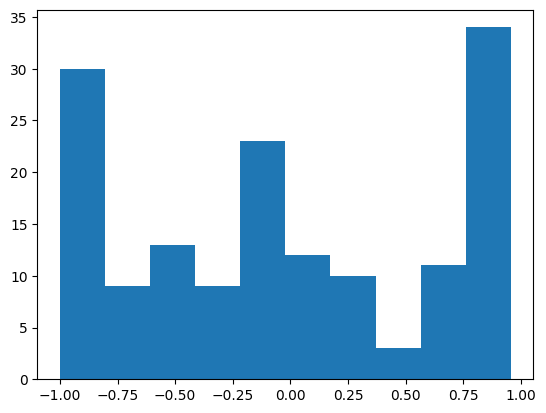

In [138]:
import math
import matplotlib.pyplot as plt
corr_list = []

for path in glob.glob('/Users/iijima.s.ad/git/article-extractor/articles/fox/*/*/person/correlation.txt'):
    with open(path, 'r') as f:
        coef = f.read().strip()
        if coef != 'nan':
            corr_list.append(float(coef))

print(np.average(corr_list))
plt.hist(corr_list)

In [86]:
!find /Users/iijima.s.ad/git/article-extractor/articles/fox/ | grep -c 'correlation.txt'

193
